In [3]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
interval = 2

url = "https://sgis.kostat.go.kr/view/catchmentArea/main#"

options = webdriver.ChromeOptions()
options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36")

browser = webdriver.Chrome(options=options)
browser.get(url)

# res = requests.get(url)
# res.raise_for_status()

# 윈도우창 최대화
browser.maximize_window()

In [4]:
# 팝업창 "취소" 클릭
cancel = browser.find_element_by_class_name("ques02")
cancel.click()

In [5]:
soup = BeautifulSoup(browser.page_source, "lxml")

In [6]:
# 행정구역 "도" 클릭
province = browser.find_element_by_class_name("selct_91")
province.click()
time.sleep(interval)

In [7]:
# 서울특별시 선택
seoul = browser.find_element_by_css_selector("#sido > option:nth-child(1)")
seoul.click()
time.sleep(interval)

In [10]:
# 행정구역 "구" 클릭
districts = browser.find_element_by_class_name("selct_92")
districts.click()
time.sleep(interval)

In [14]:
# 웹 크롤링 
import pandas as pd

# 데이터가 필요한 구 추가 및 제거
districts_list = ["도봉구", "노원구", "강북구", "성북구", "중랑구", "동대문구", "성동구", "광진구"]
districts_list.sort()

# 데이터가 필요한 편의시설 추가 및 제거
categories = ["지하철", "은행", "대형마트", "전통시장", "병원", "응급의료기관", "공원", "스포츠센터", "보건소", "사회복지시설", "행정기관", "백화점"] # 필요한 시설 추가하기

# 빈 딕셔너리 생성
result = {}

for district in districts_list:
    select_district = browser.find_element_by_xpath(f"//option[contains(text(),'{district}')]")
    select_district.click()
    time.sleep(1)
    
    # 각 구별 빈 리스트 생성
    result[district] = []
    
    for category in categories:
        
        # 편의시설 분류 창 스크롤을 내리기
        small_window = browser.find_element_by_id("mCSB_1")
        browser.execute_script("arguments[0].scrollBy(0,400)", small_window)

        # 리스트 내 카테고리 선택 및 클릭
        select_category = browser.find_element_by_xpath(f"//a[contains(text(),'{category}')]")
        select_category.click()
        time.sleep(interval)
        soup = BeautifulSoup(browser.page_source, "lxml")
        category_data = soup.select_one("ul.res_li") 
        
        category_num = 0
        
        for item in category_data :

            # 편의시설 별 데이터 추출
            category_name = item.select('li > span[class="txt02"]')
            
            if category_name != []:
                category_name = item.select('li > span[class="txt02"]')[0].get_text()
                
                # 편의시설 개수 카운팅
                category_num += 1
            else :
                category_name = None
        
        # 편의시설 개수를 빈 리스트에 추가
        result[district].append(category_num)
#         print(f'{district} {category_name}: {category_num}개')         
#        time.sleep(interval) - 컴퓨터 사양에 따라 시간 늘리기, 기본은 2초

        # 카테고리로 돌아가기 위해 뒤로가기 버튼 클릭
        backToCategory = browser.find_element_by_id("mapLocation_2")
        backToCategory.click()
        time.sleep(interval)
    print(f'{district}를 완료했습니다.')
#     print("="*30)
print("웹 크롤링을 종료합니다.")

강북구를 완료했습니다.
광진구를 완료했습니다.
노원구를 완료했습니다.
도봉구를 완료했습니다.
동대문구를 완료했습니다.
성동구를 완료했습니다.
성북구를 완료했습니다.
중랑구를 완료했습니다.
웹 크롤링을 종료합니다.


In [8]:
# 웹드라이버 종료
print("웹드라이버를 종료합니다.")
quit()

웹드라이버를 종료합니다.


In [79]:
# 카테고리를 인덱스로 갖는 데이터프레임 생성
df = pd.DataFrame(result, index=categories)
df

,강북구,광진구,노원구,도봉구,동대문구,성동구,성북구,중랑구
지하철,4,10,14,6,8,17,9,10
은행,29,56,58,25,52,55,57,31
대형마트,1,2,4,3,2,3,3,6
전통시장,11,10,2,5,19,4,9,11
병원,17,12,18,17,26,11,14,16
응급의료기관,0,4,6,2,8,2,2,6
공원,3,3,0,2,1,4,2,5
스포츠센터,193,265,341,212,238,214,237,293
보건소,3,3,3,2,2,3,2,2
사회복지시설,66,62,106,65,75,66,115,99


In [80]:
# 행과 열을 전환
df2 = df.transpose()
df2

,지하철,은행,대형마트,전통시장,병원,응급의료기관,공원,스포츠센터,보건소,사회복지시설,행정기관,백화점
강북구,4,29,1,11,17,0,3,193,3,66,17,1
광진구,10,56,2,10,12,4,3,265,3,62,16,1
노원구,14,58,4,2,18,6,0,341,3,106,20,1
도봉구,6,25,3,5,17,2,2,212,2,65,15,0
동대문구,8,52,2,19,26,8,1,238,2,75,15,1
성동구,17,55,3,4,11,2,4,214,3,66,18,0
성북구,9,57,3,9,14,2,2,237,2,115,21,1
중랑구,10,31,6,11,16,6,5,293,2,99,17,0


In [81]:
# 서울시 노인 인구 데이터 불러오기
df3 = pd.read_excel("seoul population.xls") # 엑셀 파일을 불러올 때, 경로를 설정해줄 것
df3.columns[-1]
df3.head()
df3.tail()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
23,2020,관악구,274811,509803,255211,254592,495060,248339,246721,14743,6872,7871,1.8,78875
24,2020,서초구,173502,429025,205282,223743,425126,203359,221767,3899,1923,1976,2.45,60169
25,2020,강남구,234872,544055,260378,283677,539231,257999,281232,4824,2379,2445,2.3,75096
26,2020,송파구,281959,673926,325080,348846,667960,322299,345661,5966,2781,3185,2.37,93483
27,2020,강동구,196499,463998,228044,235954,459970,226216,233754,4028,1828,2200,2.34,70019


In [82]:
# 필요한 데이터만 추출하기
df3.loc[1:28,["자치구","65세이상고령자"]]
df4 = df3.loc[1:28,["자치구","65세이상고령자"]].drop([1,2])
df4.set_index("자치구", inplace=True)
df4.head()

,65세이상고령자
자치구,
종로구,28507
중구,24495
용산구,40247
성동구,45603
광진구,50560


In [128]:
# 두 데이터 테이블 합치기

df_merged = df2.join(df4)
df_merged

,지하철,은행,대형마트,전통시장,병원,응급의료기관,공원,스포츠센터,보건소,사회복지시설,행정기관,백화점,65세이상고령자
강북구,4,29,1,11,17,0,3,193,3,66,17,1,63422
광진구,10,56,2,10,12,4,3,265,3,62,16,1,50560
노원구,14,58,4,2,18,6,0,341,3,106,20,1,85489
도봉구,6,25,3,5,17,2,2,212,2,65,15,0,62059
동대문구,8,52,2,19,26,8,1,238,2,75,15,1,61796
성동구,17,55,3,4,11,2,4,214,3,66,18,0,45603
성북구,9,57,3,9,14,2,2,237,2,115,21,1,73770
중랑구,10,31,6,11,16,6,5,293,2,99,17,0,69447


In [129]:
import numpy as np

metro = np.array(df_merged['지하철'])[0:]
bank = np.array(df_merged['은행'])[0:]
supermarket = np.array(df_merged['대형마트'])[0:]
traditional_market = np.array(df_merged['전통시장'])[0:]
hospital = np.array(df_merged['병원'])[0:]
emergency_hospital = np.array(df_merged['응급의료기관'])[0:]
park = np.array(df_merged['공원'])[0:]
sport_center = np.array(df_merged['스포츠센터'])[0:]
communityHealth_center = np.array(df_merged['보건소'])[0:]
community_center = np.array(df_merged['사회복지시설'])[0:]
public_office = np.array(df_merged['행정기관'])[0:]
departmentStore = np.array(df_merged['백화점'])[0:]

list2 = [metro,
         bank,
         supermarket,
         traditional_market,
         hospital,
         emergency_hospital,
         park,
         sport_center,
         communityHealth_center,
         community_center,
         public_office,
         departmentStore]

old_population = np.array(df_merged['65세이상고령자'])[0:].astype(int)

In [136]:
for item in list2: 
    print("\n",np.corrcoef(old_population, item), "\n")
    print("*"*30)


 [[ 1.         -0.10030134]
 [-0.10030134  1.        ]] 

******************************

 [[1.         0.01669915]
 [0.01669915 1.        ]] 

******************************

 [[1.         0.40902094]
 [0.40902094 1.        ]] 

******************************

 [[ 1.         -0.16224257]
 [-0.16224257  1.        ]] 

******************************

 [[1.         0.35365978]
 [0.35365978 1.        ]] 

******************************

 [[1.         0.28603422]
 [0.28603422 1.        ]] 

******************************

 [[ 1.         -0.53166352]
 [-0.53166352  1.        ]] 

******************************

 [[1.         0.61658839]
 [0.61658839 1.        ]] 

******************************

 [[ 1.         -0.23292309]
 [-0.23292309  1.        ]] 

******************************

 [[1.         0.82100077]
 [0.82100077 1.        ]] 

******************************

 [[1.         0.54967831]
 [0.54967831 1.        ]] 

******************************

 [[1.         0.32688231]
 [0.3268823

/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-p

/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-p

/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/monsieur/opt/anaconda3/lib/python3.7/site-packages/ma

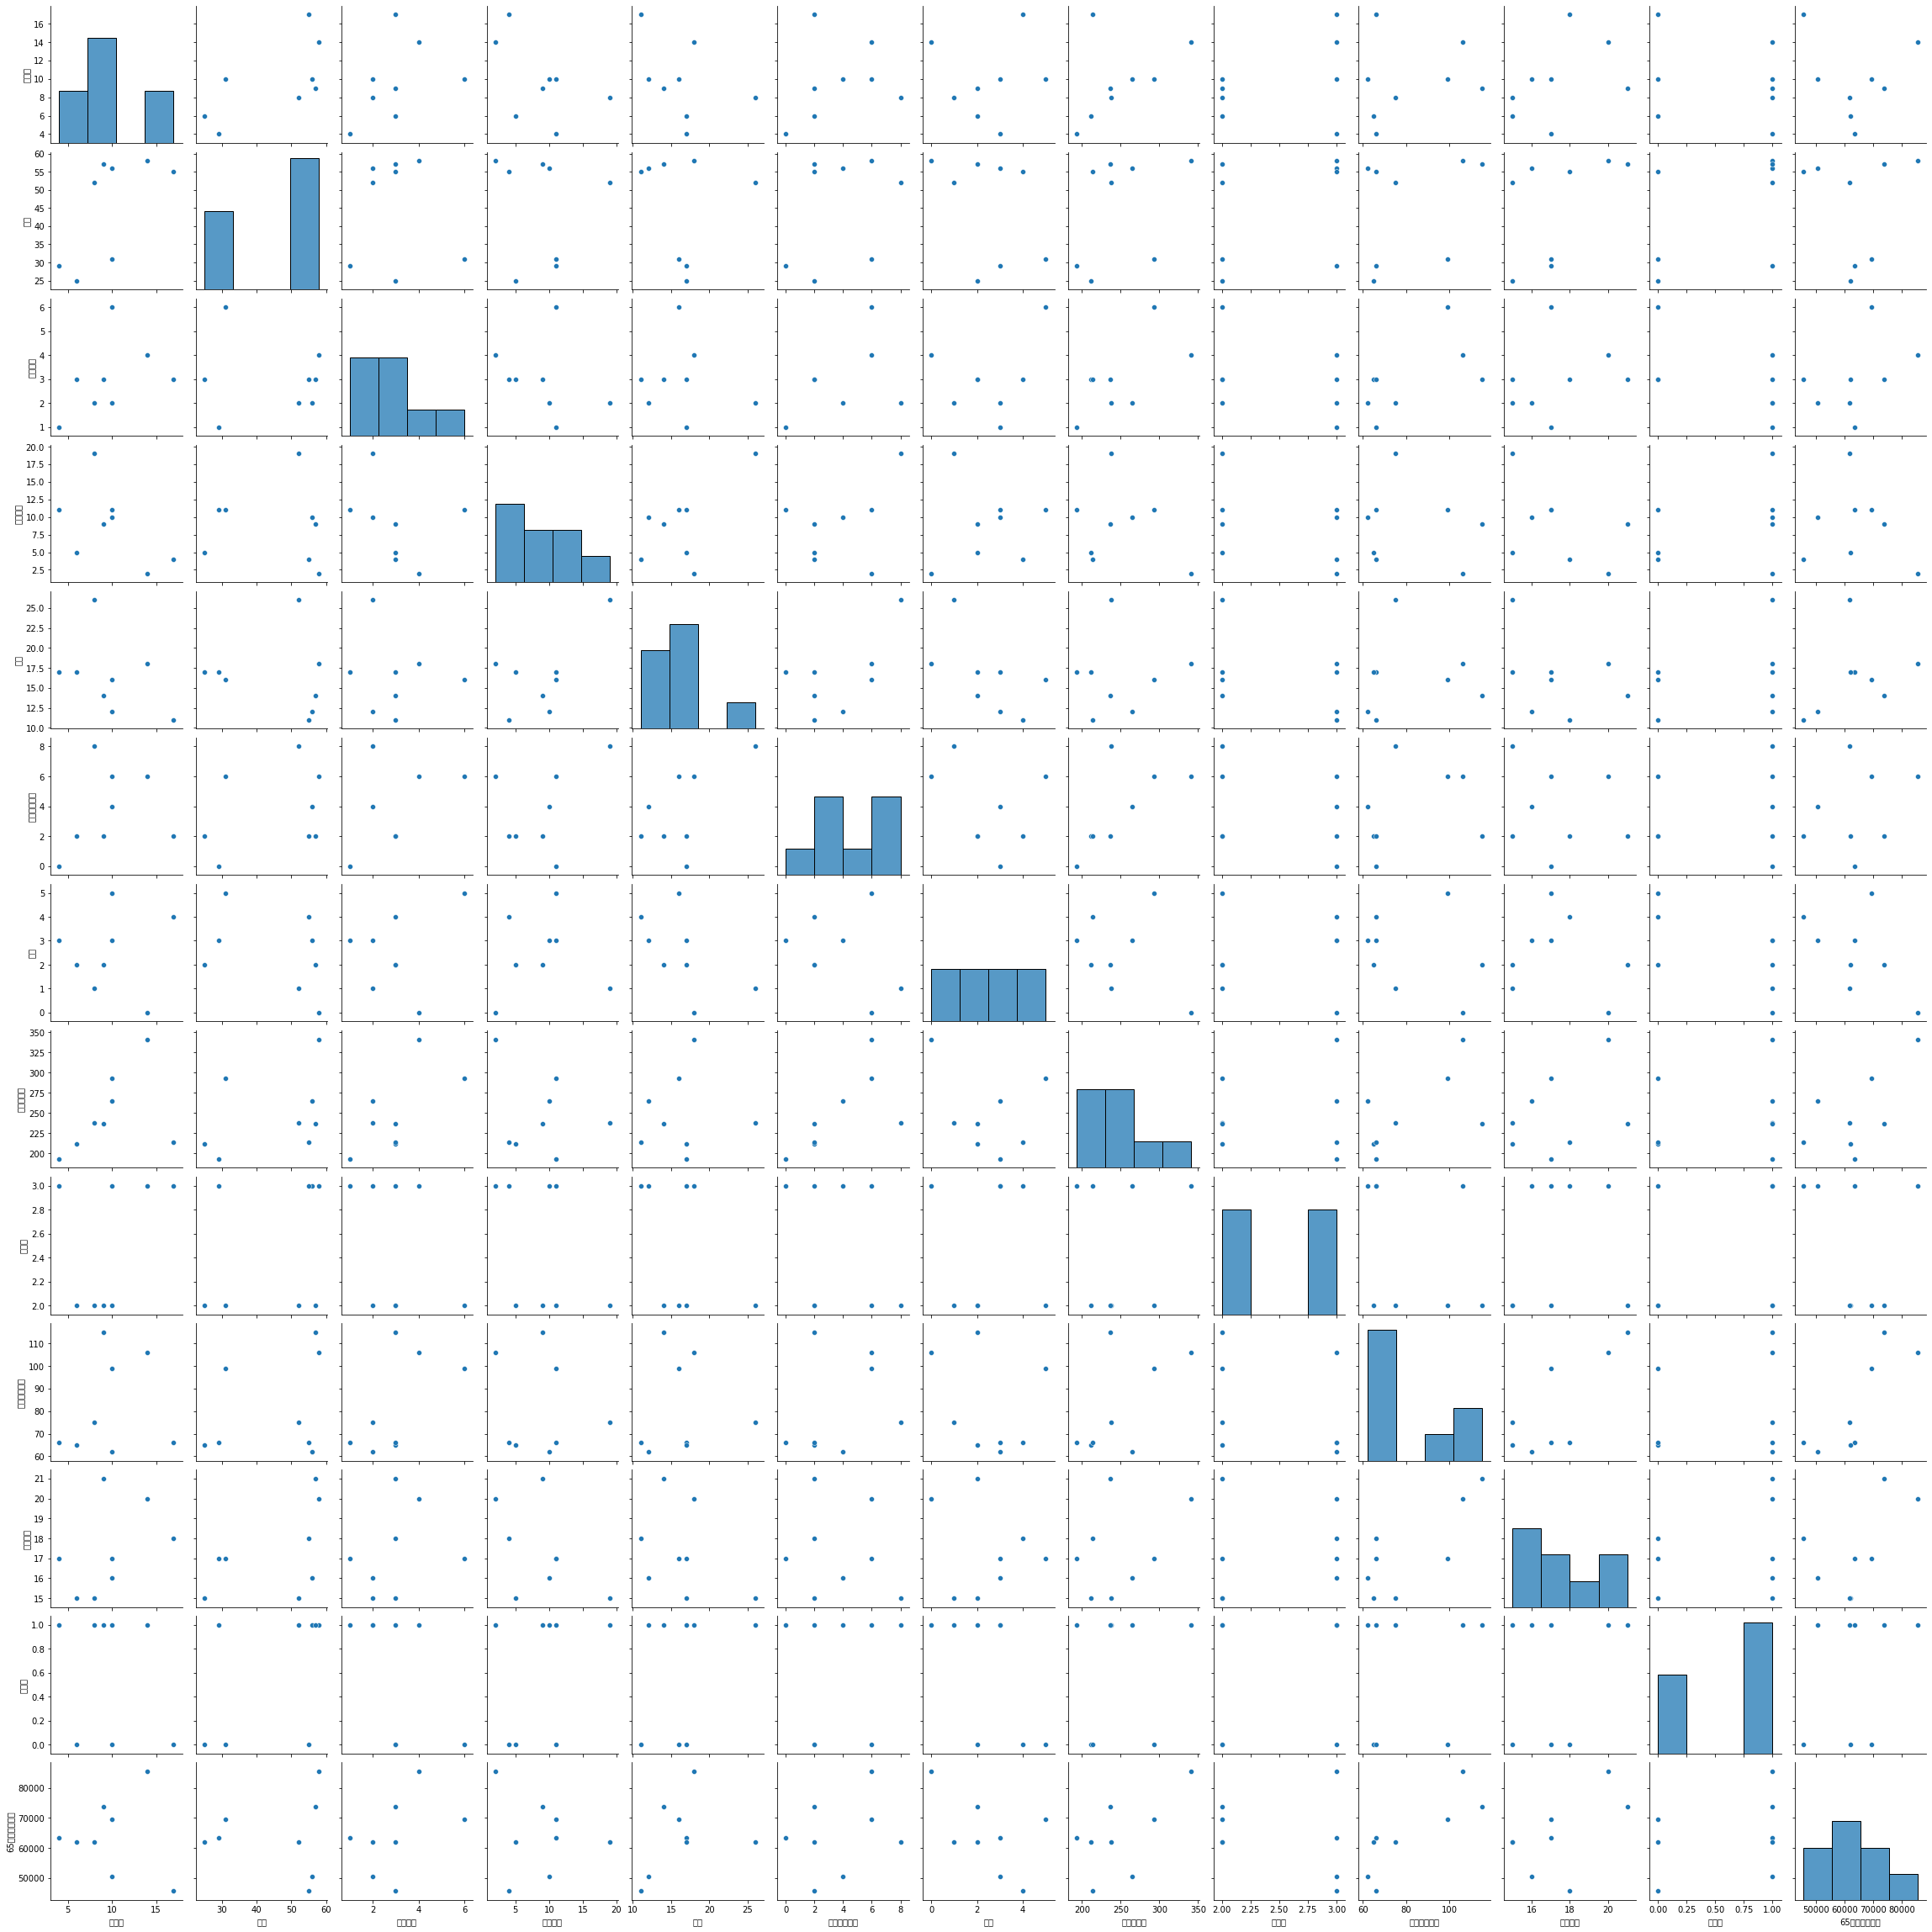

In [146]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.pairplot(df_merged)